
# Project: Investigating medical appointment patient arrival factors in Brazil
### **_by Sebastian Sbirna_**

   
   ***

## Table of Contents
<ul>
<li><a href="#intro">Introduction of the topic and dataset</a></li>
<li><a href="#wrangling">Data wrangling on the patient arrival dataset</a></li>
<li><a href="#eda">Exploratory Data Analysis and visualizations</a></li>
<li><a href="#conclusions">Conclusions and answers</a></li>
</ul>

***
   
<a id='intro'></a>

## Introduction of the topic and dataset
***

As medical clinics all over the world have experienced, patient arrival at their scheduled appointments is not guaranteed. Moreover, it seems hard for the medical personnel to explain what are the reasons behind such behaviour. 

This data analysis project aims to describe some possible factors behind patient absence from scheduled appointments in Brazil, using descriptive statistics upon a dataset of 100.000+ medical appointments collected from various medical clinics in Brazil's many neighbourhoods. 

For the scope of this project, large-scale statistical analysis will be left out, therefore the actual causality of the analysed factors upon the patients' behaviour is limited.
***

The dataset's original source has been posted [on this link](https://www.kaggle.com/joniarroba/noshowappointments). From there, one can also find the data dictionary for the dataset that will be presented here further on. As we find there, some data has been collected about each of the patients who made appointments around the timeframe of May 2016 in any of Brazil's participating clinics. 

Such data includes: the patient's gender, age, scholarship status, and various medical conditions he or she may suffer of. Along with it, we have data on whether the patient has come or not to its scheduled appointment, whether he/she received reminder SMS messages, and the dates of scheduling and appointment.


In [1]:
# Here we import all the necessary Python modules for our data analysis process

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt

By knowing which data is included into our dataset, we can ask some relevant questions to investigate the problem.
   ** **
**Based on the collected data, we would like to investigate what patient factors could be involved in their behaviour of absenting from their appointments.**

There are many potentially interesting relations to discover, however, in this report, we will be focusing on a few specific questions that we would like to investigate, which are: 
* **Do medical conditions of a person influence their appoinment presence?**



* **Does receiving state scholarship funds provide an incentive for people to meet their appoinments?**



* **Are different geographical neighbourhoods in Brazil having impact upon appointment scheduling and arrival rates?**

<a id='wrangling'></a>
## Data wrangling on the patient arrival dataset

***

In this section, we load the dataset from a CSV file in which it was stored, check for data cleanliness, assess our data structure, and perform modifications accordingly, so that it will be easy to work with the data in the next steps of the project.
### General Properties


Here we load the data into our notebook, and we print out its first 10 entries , so that we have a better idea of its contents and design.
However, we need more pieces of information in order to assess the data's structure.

In [2]:
appointment_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

appointment_df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


* The number of unique values for each *variable* (column) is very interesting for the assessment process, in order to see whether duplicates exist (*depending on the data measured*). 
* Besides that, we are interested in which column have any unrecorded entries (i.e. *NaN or NA values*), and how many of such are present. 
* Lastly, taking a look at the data types of our entries seems very relevant, since we want to perform different operations upon the columns later on, which might require specific types of data in those columns.

In [3]:
# Number of unique values in each column
appointment_df.nunique()

PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMS_received           2
No-show                2
dtype: int64

From here, we get some information on the format and values of the data: 
   * There are 61744 unique patients for the 110527 appointments conducted within the approx. 1 month of study
   * *Scholarship*, *Hipertension*, *Diabetes*, *Alcoholism*, *SMS_received*, and *No-show* all have binary variation
   * There are 81 unique neighbourhoods in Brazil from which we have data
   * As we can see, there are 104 unique age values present in the dataset. While this may be possible, it can be a point where errors have creeped through, therefore it is worth investigating
   * *Handicap* variable has 5 different unique values which it can take. This is a bit concerning, since the data description has mentioned it as a binary **_True-False_** variable

In [4]:
# Total of non-null values for each column
appointment_df.notna().sum()

PatientId         110527
AppointmentID     110527
Gender            110527
ScheduledDay      110527
AppointmentDay    110527
Age               110527
Neighbourhood     110527
Scholarship       110527
Hipertension      110527
Diabetes          110527
Alcoholism        110527
Handicap          110527
SMS_received      110527
No-show           110527
dtype: int64

Here, we get the total number of non-null values for each column entry in part. Since there are 110527 unique entries for each column, this function shows that there is no missing data from our dataset. 

However, we should still be careful to correct potential mistakes in the data, which might have crept in during the data collection process.

In [5]:
# information about the DataFrame contents
appointment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


This function here shows the internal way in which our variables are represented within the dataframe. Some comments on this are: 
   * _PatientId_ is float64, since its values are very large numbers. However, from inspecting the dataset, it seems that many of these value entries have a lot of trailing zeros in their tail. Perhaps we can try to remove those zeros and see whether we create accidentally any duplicate IDs or not. By doing so, we are testing whether we can store this data in a more compact form.
   
   
   * _No-show_ is an object variable (most likely of type *string*), however its "Yes/No" values seem ambiguous (what means _"No-show: No"_ ?). It might be a good idea to rename these values to "Arrived/Not arrived" for better clarity.
   
   
   * Perhaps I would like to transform the _ScheduledDay_ and _AppointmentDay_ dates from string objects to Python _Date_ objects, for easier data filtering and manipulation. 
   
   ***

Let us now try to investigate some of the mentioned concerns in the dataset, namely the values for variables: _Age_, _Handicap_ and _PatientId_. 

In [6]:
appointment_df[(appointment_df['Age'] >= 100) | (appointment_df['Age'] < 0)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
58014,9.762950e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196320e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196320e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196320e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196320e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
79270,9.739430e+12,5747809,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,0,1,0,No
79272,9.739430e+12,5747808,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,0,1,0,No
90372,2.342840e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
92084,5.578310e+13,5670914,F,2016-05-06T14:55:36Z,2016-06-03T00:00:00Z,100,ANTÔNIO HONÓRIO,0,0,0,0,0,1,No
97666,7.482350e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


By checking the dataset for potential outliers in respect with age, we can see that, indeed, there are some misrecordings: 
   * One patient entry has its age described as **_-1_**.
   
   
   * There are 5 age recordings of people having **_115 years_**, yet there are no age recordings of any person between 102 and 115 years. Since 115 is a very large number of years for a person to be living, and since there are rather many variables (five can be argued to be a large sample size in this case) suddenly appearing within the dataset, we have chosen to consider them as outliers and remove them from the analysis.

In [7]:
# Checking for which possible values can 'Handicap' variable take, \
# as well as the number of unexpected possibities (i.e. Handicap is neither 0 nor 1)

print(appointment_df[(appointment_df['Handicap'] == 1)].shape)
appointment_df.Handicap.unique()

(2042, 14)


array([0, 1, 2, 3, 4], dtype=int64)

Here, we have identified that, even though _Handicap_ is presented as a _True/False_ variable in the dataset documentation, its values are found within the interval (0, 1, 2, 3, 4). There is no mentioning what e.g. _Handicap = 2_ or _Handicap = 3_ could actually represent, however the number of entries where _Handicap_ deviates from expected behaviour has a total of 199 entries, which equivalates to _0.18%_ of the total number of dataset entries, and accounts for _8.9%_ of the total number of handicapped people found in the dataset. 

An assumption is made that all values above 0 represent a person having handicap, since this assumption is likely to have been the original intention in the data collection process (_it is likely that values 1, 2, 3 and 4 indicate different possibilities for handicap, however all such values refer back to handicapped people_). It must be kept in mind, however, that if this assumption turns out to have been false, this negatively influences the sample size margin by almost _10%_.

In [8]:
# Testing to check whether the trailing zeros of PatientId can be cut out without causing duplicates
def cut_zeros(element):
    while ((element % 10 == 0) and (element != 0)):
        element = element / 10
    return element

test = appointment_df['PatientId'].apply(cut_zeros)
test.nunique()

60126

As we have inspected here, if one tries to trim the _PatientId_ value entries to exclude their trailing set of zeros, this operation does indeed create unwanted duplicate conflicts (_resulting in 60123 unique patient IDs, instead of 61744_). 

However, we can still try to minimize the storing memory footprint by converting the _float_ values to _int_ values, and checking whether any value has lost digits during the conversion process.

In [9]:
# Checking for any discrepancies between data formats while performing conversion from 'float' to 'int'
print((appointment_df['PatientId'].apply(int) == appointment_df['PatientId'].apply(float)).nunique())

1


Since we only have one single unique equality value (_True_) returned across all value conversions, we can conclude that it is safe to change the data format of _PatientId_ values, in an attempt to minimize RAM memory costs.
***

### Data Cleaning

We will now clean each of the mentioned dataset variables, taking into account all previous findings.

In [10]:
# First, 'PatientId' will be converted to int values

test_appointment_df = appointment_df

appointment_df['PatientId'] = appointment_df['PatientId'].apply(int)

In [11]:
# Second, 'ScheduledDay' and 'AppointmentDay' will be converted to Date objects for easy comparison operations

def parse_date(date_string):
    return dt.strptime(date_string, '%Y-%m-%dT%H:%M:%SZ').date()

appointment_df['ScheduledDay'] = appointment_df['ScheduledDay'].apply(parse_date)
appointment_df['AppointmentDay'] = appointment_df['AppointmentDay'].apply(parse_date)

In [12]:
# Third, we will remove outliers of 'Age' property

appointment_df = appointment_df[(appointment_df['Age'] >= 0) & (appointment_df['Age'] < 115)]

In [13]:
# Fourth, all values of 'Handicap' will be mapped to the value set (0, 1), meaning that all its non-zero values will be \
# converted to value 1

def convert_handicap_values(value):
    if value >= 1:
        value = 1
    else:
        value = 0
    return value

appointment_df['Handicap'] = appointment_df['Handicap'].apply(convert_handicap_values)

C:\Users\XPS\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
# Lastly, we convert 'No-show' values from ambiguous messages to more clear strings
def convert_no_show_values(value):
    if value == 'Yes':
        value = 'Not arrived'
    elif value == 'No':
        value = 'Arrived'
    return value

appointment_df['No_show'] = appointment_df['No-show'].apply(convert_no_show_values)
del appointment_df['No-show']

C:\Users\XPS\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
# Showing the curated dataset in its final format
appointment_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872500000000,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Arrived
1,558998000000000,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Arrived
2,4262960000000,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Arrived
3,867951000000,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Arrived
4,8841190000000,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Arrived


Now, all the necessary conversion, formatting and cleaning operations have been performed, and it is possible to delve deeper into the exploration of the dataset, in order to report findings within it. 

***
<a id='eda'></a>
## Exploratory Data Analysis and visualizations

We will now begin to look at our data from multiple perspectives and answer our dataset research questions systematically. 
***
### Do medical conditions of a person influence their appoinment presence?

The first research question that we ask has to do with the relationship between certain medical conditions collected in the dataset (_i.e. Hipertension, Diabetes, Alcoholism, Handicap_) and the appointment diligence of the recorded patients. 

We would like to see whether it is likely that having certain types of medical conditions increases (or not) the patients' behavior of arriving to their appointments.

In [16]:
# Compute the arrivals/absences percentages of the appointments having patients suffering from hipertension
with_hipertension_arrival_proportion = appointment_df[appointment_df.Hipertension == 1].No_show.value_counts() \
                                       / appointment_df[appointment_df.Hipertension == 1].No_show.value_counts().sum()
without_hipertension_arrival_proportion = appointment_df[appointment_df.Hipertension == 0].No_show.value_counts() \
                                          / appointment_df[appointment_df.Hipertension == 0].No_show.value_counts().sum()

# Printing out the information
print("The arrival proportion for patients _without_ hipertension are: \n\n"+ str(without_hipertension_arrival_proportion))
print('\n')
print("The arrival proportion for patients _with_ hipertension are: \n\n"+ str(with_hipertension_arrival_proportion))

The arrival proportion for patients _without_ hipertension are: 

Arrived        0.790985
Not arrived    0.209015
Name: No_show, dtype: float64


The arrival proportion for patients _with_ hipertension are: 

Arrived        0.826972
Not arrived    0.173028
Name: No_show, dtype: float64


As we can notice from the percentage ratios, there has been only a _very slight_ increase of **_~3%_** in the arrival rate of patients diagnosed with hipertension. It can be presumed that such a small difference means that hipertension diagnosis does not reflect an actual influence upon the patients' arrival decision.

In [17]:
# Compute the arrivals/absences percentages of the appointments having patients suffering from diabetes
with_diabetes_arrival_proportion = appointment_df[appointment_df.Diabetes == 1].No_show.value_counts() / \
                                   appointment_df[appointment_df.Diabetes == 1].No_show.value_counts().sum()
without_diabetes_arrival_proportion = appointment_df[appointment_df.Diabetes == 0].No_show.value_counts() / \
                                      appointment_df[appointment_df.Diabetes == 0].No_show.value_counts().sum()

# Printing out the information
print("The arrival proportion for patients _without_ diabetes are: \n\n"+ str(without_diabetes_arrival_proportion))
print('\n')
print("The arrival proportion for patients _with_ diabetes are: \n\n"+ str(with_diabetes_arrival_proportion))

The arrival proportion for patients _without_ diabetes are: 

Arrived        0.796389
Not arrived    0.203611
Name: No_show, dtype: float64


The arrival proportion for patients _with_ diabetes are: 

Arrived        0.819967
Not arrived    0.180033
Name: No_show, dtype: float64


Within these next percentage ratios as well, there has been only a _very slight_ increase of **_~2%_** in the arrival rate of patients diagnosed with diabetes. As such, this small difference means that patients diagnosed with diabetes do not have a different behaviour in arrival rates compared to patients without the condition.

In [18]:
# Compute the arrivals/absences percentages of the appointments having patients suffering from alcoholism
with_alcoholism_arrival_proportion = appointment_df[appointment_df.Alcoholism == 1].No_show.value_counts() / \
                                     appointment_df[appointment_df.Alcoholism == 1].No_show.value_counts().sum()
without_alcoholism_arrival_proportion = appointment_df[appointment_df.Alcoholism == 0].No_show.value_counts() / \
                                        appointment_df[appointment_df.Alcoholism == 0].No_show.value_counts().sum()

# Printing out the information
print("The arrival proportion for patients _without_ alcoholism are: \n\n"+ str(without_alcoholism_arrival_proportion))
print('\n')
print("The arrival proportion for patients _with_ alcoholism are: \n\n"+ str(with_alcoholism_arrival_proportion))

The arrival proportion for patients _without_ alcoholism are: 

Arrived        0.79807
Not arrived    0.20193
Name: No_show, dtype: float64


The arrival proportion for patients _with_ alcoholism are: 

Arrived        0.798512
Not arrived    0.201488
Name: No_show, dtype: float64


The difference between patients who are alcoholics and those who aren't, is, again, _very slightly noticeable_, with an increase of only **_~0.45%_** in the arrival rate of alcoholic patients. This result reflects that there probably is no relation between appoinment show-up and alcoholism.

In [19]:
# Compute the arrivals/absences percentages of the appointments having patients suffering from some handicap
with_handicap_arrival_proportion = appointment_df[appointment_df.Handicap == 1].No_show.value_counts() / \
                                   appointment_df[appointment_df.Handicap == 1].No_show.value_counts().sum()
without_handicap_arrival_proportion = appointment_df[appointment_df.Handicap == 0].No_show.value_counts() / \
                                      appointment_df[appointment_df.Handicap == 0].No_show.value_counts().sum()

# Printing out the information
print("The arrival proportion for patients _without_ handicap are: \n\n"+ str(without_handicap_arrival_proportion))
print('\n')
print("The arrival proportion for patients _with_ handicap are: \n\n"+ str(with_handicap_arrival_proportion))

The arrival proportion for patients _without_ handicap are: 

Arrived        0.797643
Not arrived    0.202357
Name: No_show, dtype: float64


The arrival proportion for patients _with_ handicap are: 

Arrived        0.819401
Not arrived    0.180599
Name: No_show, dtype: float64


Lastly, the arrival percentages of patients who suffer from some kind of handicap has only increased _very slightly_ with **_~2%_**. Such an increase can be deemed as very small and not representative of any kind of correlation between handicap and appointment show-up.

In order to better represent the percentage ratios of _Arrivals/Non-arrivals_ between patients with/without different medical conditions, the following bar plot was constructed, with the different possible categories of conditions outlined on the X axis, and the percentage values on the Y axis.

Text(0,0.5,'Patient medical conditions')

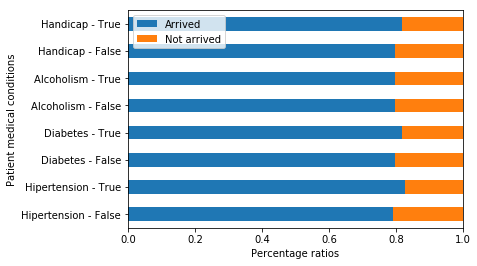

In [20]:
# Construct Python DataFrame using the different Series from the previous calculations, 
# and building a stacked barplot for data representation
%matplotlib inline

pd.DataFrame([without_hipertension_arrival_proportion, with_hipertension_arrival_proportion, 
              without_diabetes_arrival_proportion, with_diabetes_arrival_proportion,
              without_alcoholism_arrival_proportion, with_alcoholism_arrival_proportion,
              without_handicap_arrival_proportion, with_handicap_arrival_proportion], 
             index = ['Hipertension - False', 'Hipertension - True', 'Diabetes - False', 'Diabetes - True', 
                      'Alcoholism - False', 'Alcoholism - True', 'Handicap - False', 'Handicap - True']
            ).plot.barh(stacked = True)

# Set the upper y-axis plot limit to 1.00 (equivalating to 100%)
# %matplotlib notebook
plt.xlim(0.0, 1.0)

plt.xlabel("Percentage ratios")
plt.ylabel("Patient medical conditions")

As a conclusion to this research question, **there are _no_ measured medical conditions which appear to influence the arrival behaviour of patients**.

***
### Does receiving state scholarship funds provide an incentive for people to meet their appoinments?

In [21]:
# Expressing the number of patients that receive/or not scholarship only in relation to the 'No_show' variable
scholarship_count_df = appointment_df.groupby(['Scholarship', 'No_show'])['Scholarship'].count().unstack('No_show')

# When considering scholarship category values, we are converting, from number of patients who arrive/don't arrive, 
# into percentages of the total
scholarship_count_df.apply(lambda row: row / row.sum(), axis = 1)

No_show,Arrived,Not arrived
Scholarship,,
0,0.801947,0.198053
1,0.762637,0.237363


This result is not very convincing, as it shows that the percentage of patients who are on scholarship are actually _very slightly_ **more likely to skip** their appointments rather than come. The next barplot of percentages also shows this behavior.

Text(0,0.5,'Scholarship received')

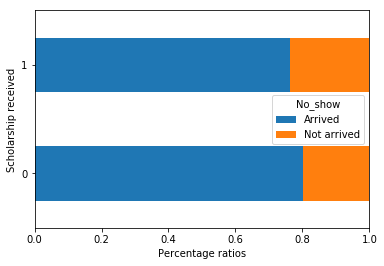

In [22]:
scholarship_count_df.apply(lambda row: row / row.sum(), axis = 1).plot(kind = 'barh', stacked = True)

plt.xlim(0.0, 1.0)
plt.xlabel("Percentage ratios")
plt.ylabel("Scholarship received")

However, this result is found to have a dimension of **_~4%_** difference, which, as with the previously investigated variables, does not appear to have a significant impact upon the patient arrival decision behaviour.

***
### Are different geographical neighbourhoods in Brazil having impact upon appointment scheduling and arrival rates?

In this scenario, we are interested in finding whether being in a certain neighbourhood has impact upon:
  * _the number of days one has to wait before reaching an appointment with a doctor_;
  * _the ratio of arrivals of patients within each neighbourhood_;
  

We have decided to approach this question from multiple sides:

  * First, we will investigate the ratio of patient arrivals within each neighbourhood, to see whether there are certain areas which are more likely to have high/low number of appointment presence (compared to the country mean).
  * Then, we decide to investigate what influence does the neighbourhood have upon the waiting time, by considering how many waiting days there are on average (between the scheduling day and the appointment day) in each neighbourhood.
  
***

We will first analyze the patient arrival ratios in each neighbourhood, and report findings from there.

In [23]:
# Converting the days within a Date object to an integer
def convert_days_to_int(date_entry):
    return date_entry.days

In [24]:
# Here, we are adding another column to the dataset, 'WaitingDays', representing the difference in days between 
# the scheduling day and the appointment day

# This operation is performed in order to make operations on the patient waiting days more convenient
appointment_df['WaitingDays'] = (appointment_df['AppointmentDay'] - appointment_df['ScheduledDay']).apply(convert_days_to_int)

C:\Users\XPS\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Now, we will find the _arrived_ and _not arrived_ number of patients within each neighbourhood. 

By exploring the data, we have noticed two neighbourhoods where one of these values was not present (_i.e. NaN_), therefore we will fill such occurences with the value of _0.0_ (in order to not influence our counting).

In [25]:
neighbourhood_no_show_count_df = appointment_df.groupby(['Neighbourhood', 'No_show'])['Neighbourhood'].count().\
                                 unstack('No_show').fillna(0).sort_values(by = 'Neighbourhood', ascending = False)
neighbourhood_no_show_count_df.head()

No_show,Arrived,Not arrived
Neighbourhood,,
VILA RUBIM,710.0,141.0
UNIVERSITÁRIO,120.0,32.0
TABUAZEIRO,2559.0,573.0
SÃO PEDRO,1933.0,515.0
SÃO JOSÉ,1548.0,428.0


Now, we will convert from counting the patient number to representing the percentages of _Arrived/Not arrived_ patients within each neighbourhood.

In [26]:
# We will divide each row element (patient number) to its row total of elements (total patient count for the neighbourhood)
neighbourhood_no_show_percentages_df = neighbourhood_no_show_count_df.apply(lambda s : s /(s['Arrived'] + s['Not arrived']), 
                                                                            axis = 1)
neighbourhood_no_show_percentages_df.head()

No_show,Arrived,Not arrived
Neighbourhood,,
VILA RUBIM,0.834313,0.165687
UNIVERSITÁRIO,0.789474,0.210526
TABUAZEIRO,0.817050,0.182950
SÃO PEDRO,0.789624,0.210376
SÃO JOSÉ,0.783401,0.216599


Lastly, we will make a bar plot to visualize these percentages for each neighbourhood, side by side, along with the mean percentage of appointment arrivals over all neighbourhoods.

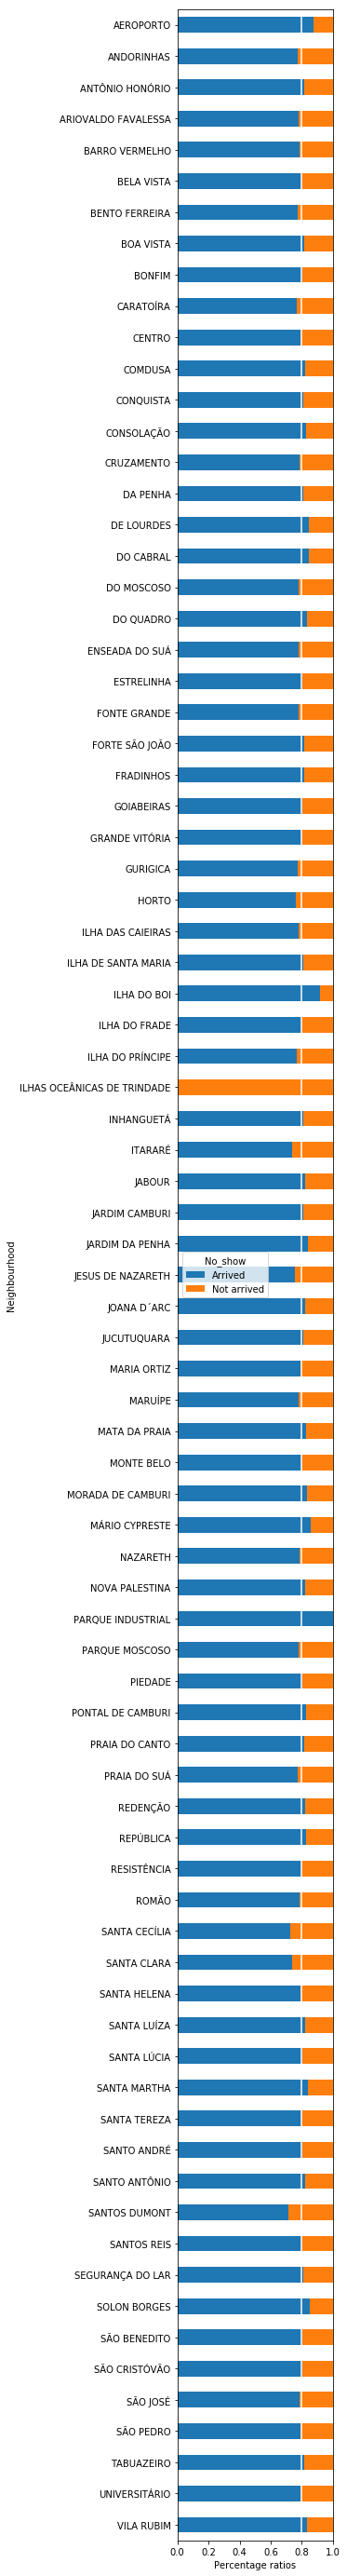

In [27]:
# Set the matplotlib inline figure size, to scale with our current purposes
plt.rcParams['figure.figsize'] = [3, 50]

neighbourhood_no_show_percentages_df.plot.barh(stacked = True)

# Set the x (percentage) axis limit to 1.00
plt.xlim(0.0, 1.0)

plt.xlabel('Percentage ratios')

# Set a vertical line, corresponding to the mean percentage of patient arrivals across all neighbourhoods

# [0] representing the 'Arrived' number of patients
arrival_mean_percentage = (appointment_df.groupby(['No_show'])['Neighbourhood'].count() / appointment_df.No_show.count())[0] 

# [1] representing the 'Not arrived' number of patients
non_arrival_mean_percentage = (appointment_df.groupby(['No_show'])['Neighbourhood'].count() / appointment_df.No_show.count())[1] 

plt.axvline(arrival_mean_percentage, color="white", linestyle="-")

There are multiple findings from this plot:
  * Almost all neighbourhoods have arrivals which fit the mean line within _~5%_, thereby this signals that there is a patient appointment absence trend of **_~20%_** (_meaning that about 20% of the appointments patients make in Brazil will be absences_), which is representative for the country as a whole, rather then being a localized phenomenon of some neighbourhoods.
  * Exceptions to this are:
    * _Aeroporto_ and _Ilha do Boi_, where appointment arrival is **_at least 5%_ higher** than the country mean.
    * _Itararé_, _Santa Cecília_, _Santa Clara_ and _Santos Dumont_, where appointment arrival is **_at least 5%_ lower** than the country mean.
  * The neighbourhood region appears to _very slightly_ affect the arrival rate of patients.
  * The area _Parque Industrial_ does not have any patient data of appoinment absence during the time period of the collected data, which is why it appears with 100% arrival rate.
  * The area _Ilhas Oceanicas de Trindade_ does not have any patient data of appoinment arrival during the time period of the collected data, which is why it appears with 0% arrival rate.

Below, we will create another plot of this data, namely a horizontal unstacked bar plot, with arrival/absence for each neighbourhood being presented separately, in order to give better visualization posibilities for readers.

In [28]:
# We are going to create a plot in Seaborn, which will require that our dataframe is structured in a certain way
# We would like to create a DataFrame having: neighbourhood categories, the no_show values, and also the arrival percentages\
# for each neighbourhood, each as a separate column within the DataFrame

# Here we try to recreate the arrival ratios for each neighbourhood within a new dataframe, grouped by neighbourhood
neighbourhood_count_by_no_show = appointment_df.groupby(by = ['Neighbourhood', 'No_show']).count()['PatientId']
neighbourhood_count_by_no_show_total = appointment_df.groupby(by = ['Neighbourhood']).count()['No_show']

neighbourhood_percentages_df = pd.DataFrame(data = neighbourhood_count_by_no_show.div(neighbourhood_count_by_no_show_total), 
                                            columns = ['Percentages'])
neighbourhood_percentages_df.head()

Percentages
Neighbourhood   No_show                 
AEROPORTO       Arrived         0.875000
                Not arrived     0.125000
ANDORINHAS      Arrived         0.770593
                Not arrived     0.229407
ANTÔNIO HONÓRIO Arrived         0.815498

In [29]:
# Now we restore the 'neighbourhood' and 'no_show' values as frame columns (by resetting the dataframe's index)
neighbourhood_percentages_df = neighbourhood_percentages_df.reset_index(level = ['Neighbourhood', 'No_show'])
neighbourhood_percentages_df.head()

,Neighbourhood,No_show,Percentages
0,AEROPORTO,Arrived,0.875000
1,AEROPORTO,Not arrived,0.125000
2,ANDORINHAS,Arrived,0.770593
3,ANDORINHAS,Not arrived,0.229407
4,ANTÔNIO HONÓRIO,Arrived,0.815498


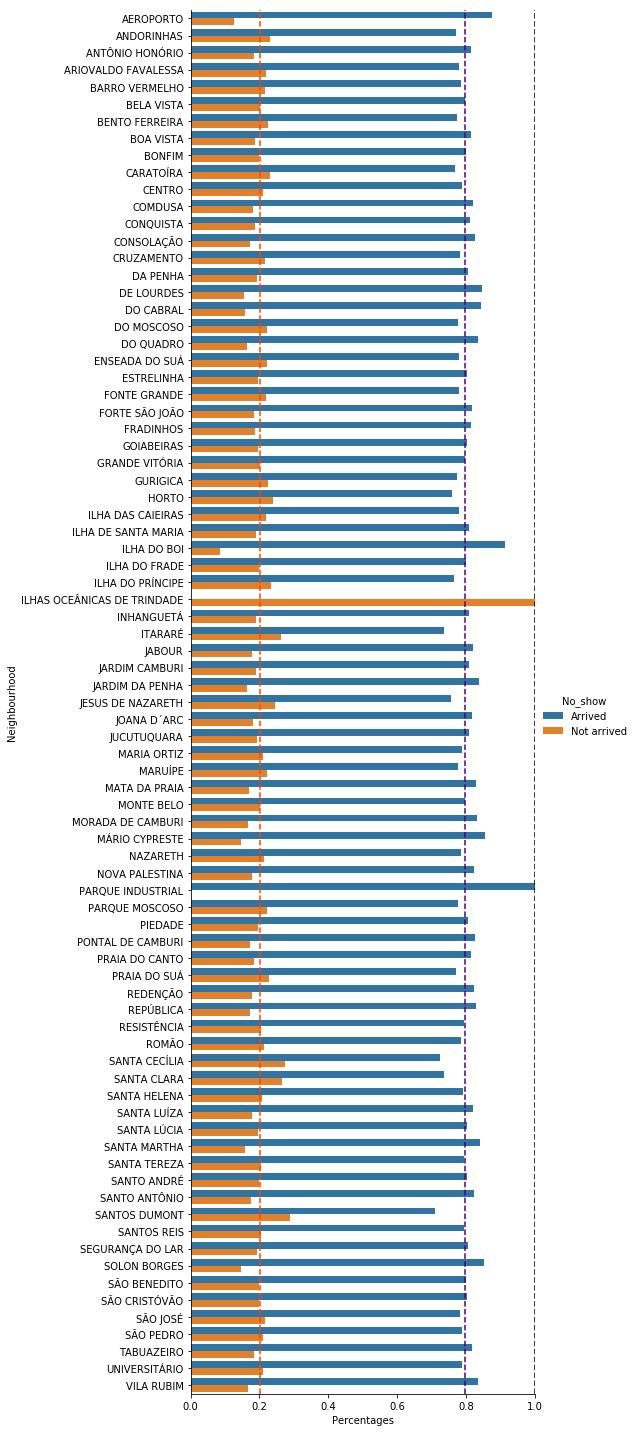

In [30]:
# Plot the horizontal barplot, together with lines for the mean arrival ratios across all neighbourhoods
plot = sns.catplot('Percentages', y = 'Neighbourhood', data = neighbourhood_percentages_df, hue = 'No_show', kind = 'bar', 
                   height = 20, aspect = 0.4)

# Set a vertical line, corresponding to the mean percentage of arriving patients across all neighbourhoods
plt.axvline(arrival_mean_percentage, color="indigo", linestyle="--")
# Set a vertical line, corresponding to the mean percentage of absent patients across all neighbourhoods
plt.axvline(non_arrival_mean_percentage, color="orangered", linestyle="--")

# Define the x-axis limit (0% - 100%)
plt.xlim(0.0, 1.0)

# Plot a line for highlighting the maximum value that any category on the y axis can take
plt.axvline(1.0, color="k", linestyle="--")

The same patterns mentioned before can be seen from this visualization, albeit from a slightly different perspective.

***

In the final point of our exploration for this dataset, we would also like to investigate whether the patient waiting times for appointments also follows a country-wide pattern, and, if not, which neighbourhoods drift substantially from the mean country-wide waiting time. 

A categorical plot visualization with data from each neighbourhood will be obtained below, along with two vertical lines representing the means, across all neighbourhoods, for arriving and absent patient waiting days.

In [31]:
# Finding the mean number of waiting days for each neighbourhood and arrival category, in part
neighbourhood_waiting_days_df = appointment_df.groupby(['Neighbourhood', 'No_show'], as_index = False)['WaitingDays'].mean()

# Calculating country-wide mean for patient days of waiting, separated into the two arrival categories
arrived_waiting_days_mean = neighbourhood_waiting_days_df[neighbourhood_waiting_days_df['No_show'] == 'Arrived'] \
                            .WaitingDays.mean()
not_arrived_waiting_days_mean = neighbourhood_waiting_days_df[neighbourhood_waiting_days_df['No_show'] == 'Not arrived'] \
                                .WaitingDays.mean()

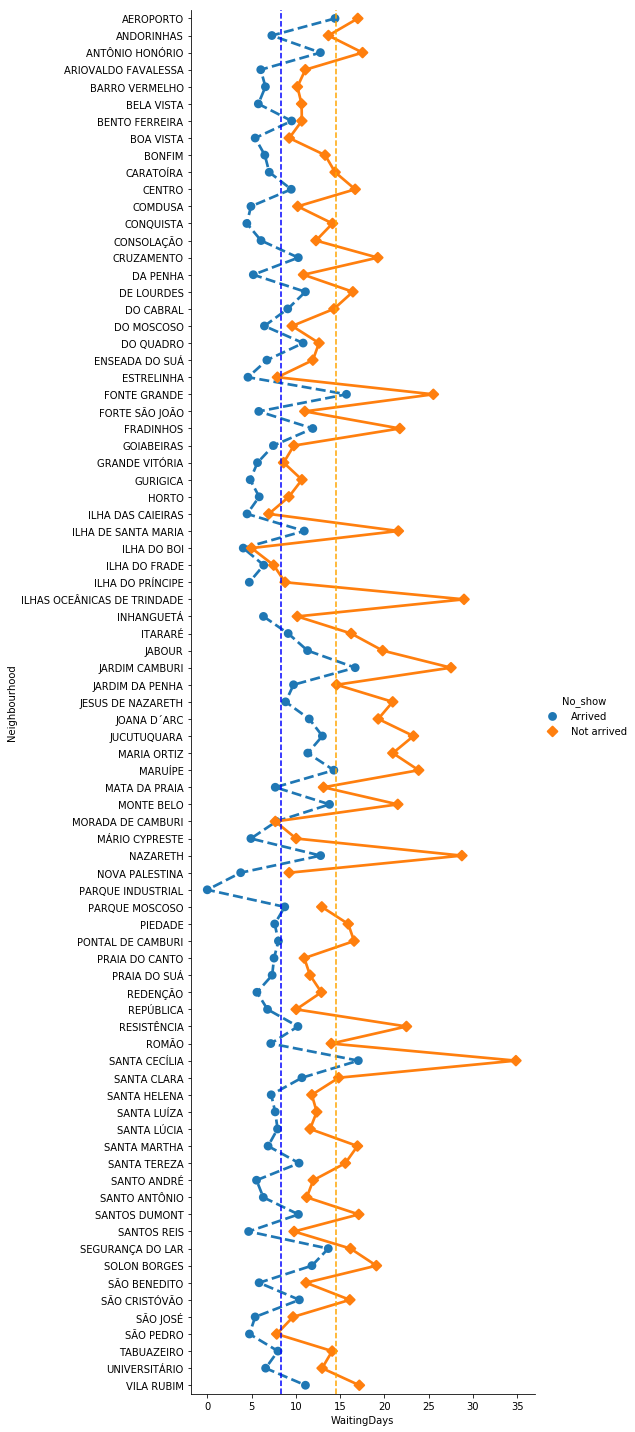

In [32]:
# Plotting the waiting days with respect to each neighbourhood 
sns.catplot(x = 'WaitingDays', y = 'Neighbourhood', data = neighbourhood_waiting_days_df, hue = 'No_show', kind = 'point', 
                   height = 20, aspect = 0.4, markers = ['o', 'D'], linestyles = ['--', '-'])

# Set a vertical line, corresponding to the mean number of waiting days for arriving patient across all neighbourhoods
plt.axvline(arrived_waiting_days_mean, color="blue", linestyle="--")
# Set a vertical line, corresponding to the mean number of waiting days for absenting patient across all neighbourhoods
plt.axvline(not_arrived_waiting_days_mean, color="orange", linestyle="--")

From this plot, we can see some interesting results: 

  * First of all, the mean number of necessary days of waiting for patients who didn't arrive for their appointments is higher (**_14.6 days_**) than for the arriving ones (**_8.3 days_**). Since the sample size used for the mean's computation is rather large, from here we can derive a potential conclusion: **_the longer a patient's waiting time, the less likely it is that the patient will arrive_**. (_However, this would likely need further statistical backup._) It is based on the idea that patients who are absent from medical appoinments might not be showing up because their waiting time is longer than what they can afford. While the actual behaviour of these patients is unknown to us, we can assume that, within that time they might have healed from their problem (_e.g. a cold_) or have found medication by themselves.
  
  
  * Secondly, we can see that, for almost all neighbourhoods, the waiting time differences between each neighbourhood's mean and the country-wide mean has the same direction and similar absolute value away from the mean (_meaning that both values are either lower or higher than the country-wide mean, and, generally, they are also proportional_). This indicates that **_most neighbourhoods have a trend in appointment waiting time deviation which patients can strongly expect_**, since it occurs with same (or similar) proportionality in the same direction (either less or more waiting time) for both types of patients.
  
  
  * Third, it can be seen that **_the number of waiting days seems to differ quite strongly from neighbourhood to neighbourhood_**, probably indicating that this waiting time, for both patient groups, is dependant on the region where the patient and medical clinic are located. 

_However, from this plot and numbers alone, we cannot be sure of the exact deviation of each country from its standardized mean. Therefore, we will make another set of computations, which normalize the day-counts into a number of standard deviations from its category's mean._

In [33]:
# Here we will try to normalize the counted waiting day values into number of deviations from category mean
arrived_normalized_series = (neighbourhood_waiting_days_df[neighbourhood_waiting_days_df['No_show'] == 'Arrived']['WaitingDays']\
                           - neighbourhood_waiting_days_df[neighbourhood_waiting_days_df['No_show'] == 'Arrived']['WaitingDays']\
                             .mean()) / neighbourhood_waiting_days_df[neighbourhood_waiting_days_df['No_show'] == 'Arrived']\
                            .WaitingDays.std()

not_arrived_normalized_series = \
                (neighbourhood_waiting_days_df[neighbourhood_waiting_days_df['No_show'] == 'Not arrived']['WaitingDays']\
                 - neighbourhood_waiting_days_df[neighbourhood_waiting_days_df['No_show'] == 'Arrived']['WaitingDays'].mean())\
                / neighbourhood_waiting_days_df[neighbourhood_waiting_days_df['No_show'] == 'Not arrived'].WaitingDays.std()

# Convert and overwrite count values in the previous dataframe with the mean deviations, added by index
neighbourhood_waiting_days_df['WaitingDays'] = (arrived_normalized_series.add(not_arrived_normalized_series, fill_value = 0))

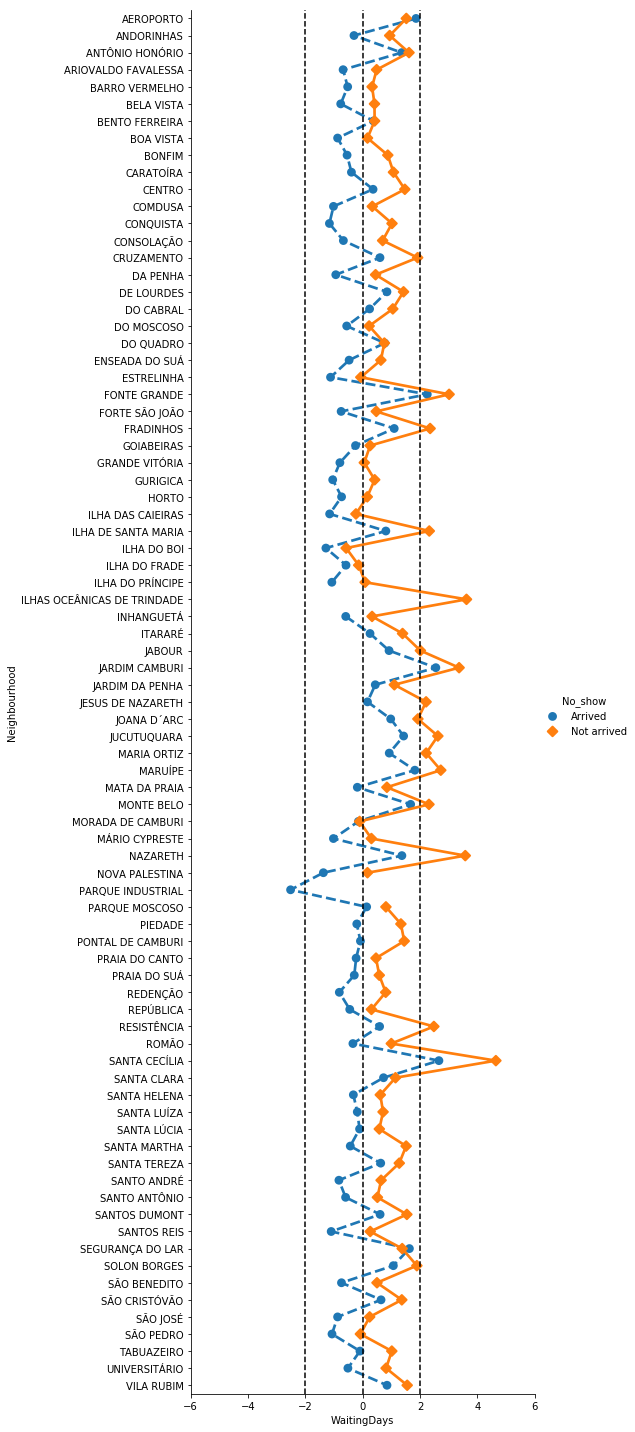

In [34]:
# Plotting the waiting day deviations from the category mean, with respect to each neighbourhood 
sns.catplot(x = 'WaitingDays', y = 'Neighbourhood', data = neighbourhood_waiting_days_df, hue = 'No_show', kind = 'point', 
                   height = 20, aspect = 0.4, markers = ['o', 'D'], linestyles = ['--', '-'])

# Define the x-axis limit (referencing to standard deviation units)
plt.xlim(-6, 6)

# Set vertical lines corresponding to the borders of being between two units of standard deviation from the mean number of 
# country-wide appointment waiting days
plt.axvline(-2.0, color="black", linestyle="--")
plt.axvline(0.0, color="black", linestyle="--")
plt.axvline(2.0, color="black", linestyle="--")

From this categorical plot, we can see that, indeed, there are a number of neighbourhoods which have patient appointment waiting times much different than the expected country-wide value (_generally, we are recognising many **increased time figures**_).

Within this plot, we gather the findings that:
  * There are **_14_** (_out of 80_) neighbourhoods which have **_waiting times higher than 95% of all neighbourhoods_**. This means that  **_17.5%_** of the country neighbourhoods present a default risk for patients to have much larger waiting time given to them, only because they are booking an appointment with a medical center within that area.
    * Out of these, **_5_** areas are having **_waiting times higher than 99.7% of all neighbourhoods_** (_namely:_ _Fonte Grande_, _Ilhas Oceânicas de Trindade_, _Jardim Camburi_, _Nazareth_, and _Santa Cecília_), presenting a great default risk and disadvantage for all citizens booking medical appointments within these areas, as their appointments will very probably be made very long (**_up to 32 days_**) after the scheduling date.
    
From the previously mentioned findings, we also make the conclusion that: **_neighbourhood area can greatly influence patient waiting time for medical appointments in Brazil._**

<a id='conclusions'></a>
***
## Conclusions and answers

Lastly, we will restate our three research questions of interest, along with a summary of our conclusions:

* **Do medical conditions of a person influence their appoinment presence?**
  * The measured and collected dataset medical conditions (_Hipertension, Diabetes, Alcoholism, Handicap_) did not seem to have any significant influence on patient arrival rates.


* **Does receiving state scholarship funds provide an incentive for people to meet their appoinments?**
  * The state scholarship fund receival did not seem to have a major influence on patient arrival rates (however, it needs to be mentioned that patients receiving these funds are _slightly less likely_ to arrive for appointments).


* **Are different geographical neighbourhoods in Brazil having impact upon appointment scheduling and arrival rates?**
  * Neighbourhood location can influence patient waiting time for medical appointments in Brazil.
  * _17.5%_ of the neighbourhoods have greatly increased medical appointment patient waiting time.
  * _Five_ neighbourhood areas in Brazil have waiting times up to 32 days from date of scheduling.
  * Non-arriving patients generally have been given longer waiting times than for the arriving patients.
  * The neighbourhood region appears to _very slightly_ affect the arrival rate of patients.
  * Almost all neighbourhoods (_with few exceptions_) have patient arrival ratios close to the mean country-wide values of _80%/20%_ (_arriving/absent patients_).

As according to the scope and manner of the project criteria, these results have been found through scrutinous data exploration and basic statistical measurements, however consolidating the degree of certainty for these descriptions would benefit from more detailed statistical reinforcement.